In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
from sklearn.datasets import load_iris
from celluloid import Camera
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.DataFrame(data=load_iris().data , columns = load_iris().feature_names) 

In [3]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X = data['petal length (cm)']
Y = data['petal width (cm)']

In [5]:
len(X), len(Y)

(150, 150)

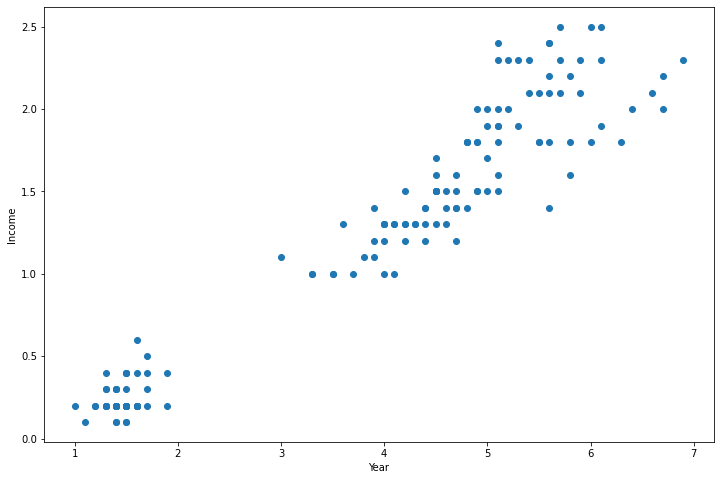

In [6]:
plt.figure(figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Income')
plt.scatter(X,Y)


In [7]:
m = 0
b = 0
alpha = 0.0001
n = len(X)
theta = 0.1
max_iter = 1000
m_list = []
b_list = []
y_pred_list = []
error_list = []
for i in range(max_iter):
    pred_y = m*X + b
    
    m_list.append(m)
    b_list.append(b)
    y_pred_list.append(pred_y)
    
    error = (1/n) * sum((Y - pred_y)**2)
    error_list.append(error)
    if error < theta:
        print(f"Line is Convergerd after {i} Iteration")
        break
    
    dm = (-2/n) * sum(X * (Y - pred_y))
    db = (-2/n) * sum(Y- pred_y)
    b = b - alpha * db
    m = m - alpha * dm
    
m_list = np.array(m_list).flatten()
b_list = np.array(b_list).flatten()
error_list = np.array(error_list).flatten()


Line is Convergerd after 600 Iteration


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
Animation complete


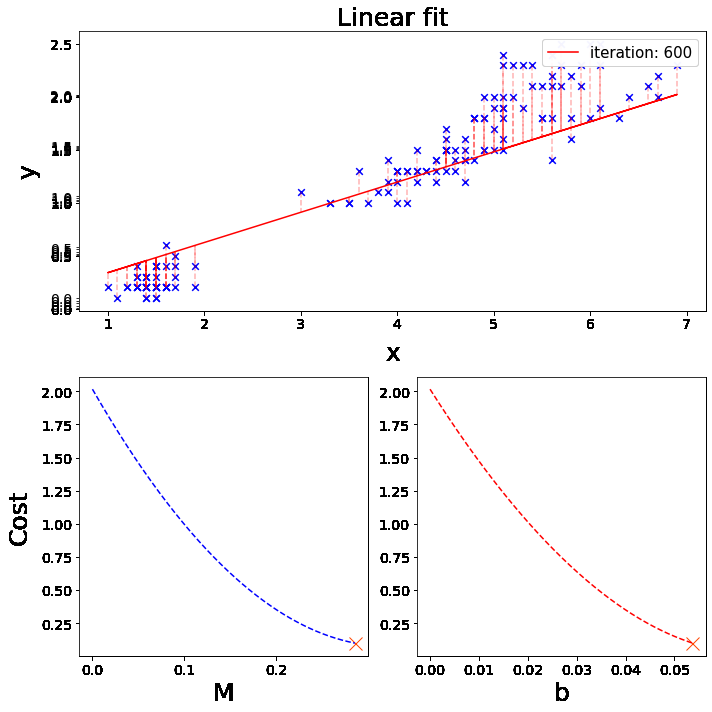

In [9]:
fig = plt.figure(figsize=(10,10))
labelsize_ = 14
camera = Camera(fig)

for i in range(len(y_pred_list)):
    if i % 20 == 0:
        ax0=fig.add_subplot(2, 1, 1) 
        leg=ax0.plot(X,y_pred_list[i], color='r', label=str(i))
        ax0.scatter(X, Y, color='b',marker='x', s=44)
        ax0.vlines(X, ymin=Y.T, ymax=y_pred_list[i],
                   linestyle="dashed",color='r',alpha=0.3)    # plot connecting lines
        ax0.legend(leg,[f'iteration: {i}'], loc='upper right', fontsize=15)
        ax0.set_title("Linear fit", fontsize=25)
        ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
        ax0.set_xlabel("x", fontsize=25, labelpad=10)
        ax0.set_ylabel("y", fontsize=25, labelpad=10)
        ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
        #ax0.set_ylim([1.75, 4.5])
        print(i)
        
        ax1=fig.add_subplot(2, 2, 3) 
        ax1.plot(m_list[i], error_list[i], marker='x', markersize=13, color="orangered")
        ax1.plot(m_list,error_list , linestyle='dashed', color="blue")
        ax1.set_xlabel("M", fontsize=25)
        ax1.set_ylabel("Cost", fontsize=25, labelpad=10)
        ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

        ax2=fig.add_subplot(2, 2, 4, sharey=ax1) 
        ax2.plot(b_list[i], error_list[i], marker='x', markersize=13, color="orangered")
        ax2.plot(b_list,error_list , linestyle='dashed', color="red")
        ax2.set_xlabel("b", fontsize=25)
        ax2.tick_params(axis='both', which='major', labelsize=labelsize_)
    
        plt.tight_layout()
        camera.snap()

print("Animation complete")

In [10]:
animation = camera.animate(interval = 1,
                          repeat = False, repeat_delay = 500)
animation.save('SimpleLinReg_2.gif', writer = 'imagemagick')   
print('GIF Created')

GIF Created


In [12]:
display.HTML('<img src="SimpleLinReg_2.gif">')